This code gives an introduction to unsupervised learning by solving a clustering problem using **K-Means Clustering** following [this tutorial](https://youtu.be/EItlUEPCIzM).

Replace 'XLABEL' and 'YLABEL' with the respective labels in your data set.

# Problem description
Enter in the text cell below the clustering problem that you're about to work on. 

What is your X and Y label?

Import packages

In [17]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


Import and explore the data set

In [18]:
df = pd.read_csv('cleanedfile.csv')

2. Display columns and describe the data set

In [19]:
df.describe()

,Unnamed: 0,season,week_num,home_score,away_score,arrests
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,464.714286,2012.821429,9.803571,24.035714,22.964286,7.017857
std,332.005516,1.363247,4.441210,7.258761,7.236183,10.370397
min,3.000000,2011.000000,1.000000,13.000000,10.000000,0.000000
25%,187.750000,2012.000000,6.750000,19.750000,17.000000,1.000000
50%,439.000000,2013.000000,10.000000,23.000000,23.000000,3.000000
75%,781.750000,2014.000000,13.000000,29.000000,26.250000,7.250000
max,985.000000,2015.000000,17.000000,44.000000,41.000000,41.000000


Scatter plot

Text(0, 0.5, 'away_score')

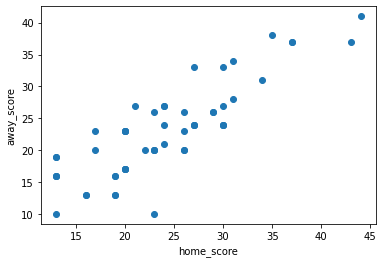

In [20]:
plt.scatter(df.home_score,df['away_score'])
plt.xlabel('home_score')
plt.ylabel('away_score')

Fit and predict three clusters for the data

In [21]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['home_score','away_score']])
y_predicted

array([2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0,
       2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0], dtype=int32)

In [22]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,cluster
0,3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y,2
1,4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n,2
2,6,2011,15,Sunday,2:15:00 PM,Arizona,Cleveland,20,17,OT,1.0,n,2
3,7,2011,17,Sunday,2:15:00 PM,Arizona,Seattle,23,20,OT,4.0,y,0
4,10,2012,4,Sunday,1:05:00 PM,Arizona,Miami,24,21,OT,4.0,n,0


In [23]:
km.cluster_centers_

array([[25.17857143, 23.71428571],
       [35.33333333, 35.66666667],
       [17.        , 15.84210526]])

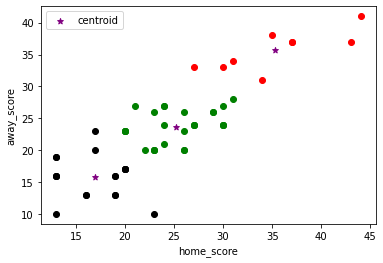

In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.home_score,df1['away_score'],color='green')
plt.scatter(df2.home_score,df2['away_score'],color='red')
plt.scatter(df3.home_score,df3['away_score'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('home_score')
plt.ylabel('away_score')
plt.legend()

Fit the model using MinMaxScaler()

In [25]:
scaler = MinMaxScaler()

scaler.fit(df[['away_score']])
df['away_score'] = scaler.transform(df[['away_score']])

scaler.fit(df[['home_score']])
df['home_score'] = scaler.transform(df[['home_score']])

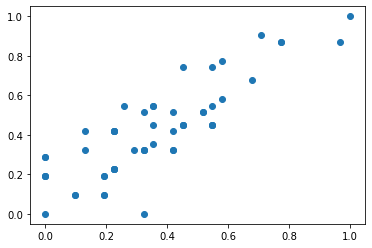

In [26]:
plt.scatter(df.home_score,df['away_score'])

In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['home_score','away_score']])
y_predicted

array([0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2], dtype=int32)

In [28]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,cluster
0,3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,0.193548,0.096774,OT,6.0,y,0
1,4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,0.193548,0.096774,OT,3.0,n,0
2,6,2011,15,Sunday,2:15:00 PM,Arizona,Cleveland,0.225806,0.225806,OT,1.0,n,0
3,7,2011,17,Sunday,2:15:00 PM,Arizona,Seattle,0.322581,0.322581,OT,4.0,y,2
4,10,2012,4,Sunday,1:05:00 PM,Arizona,Miami,0.354839,0.354839,OT,4.0,n,2


In [29]:
km.cluster_centers_

array([[0.12903226, 0.18845501],
       [0.72043011, 0.82795699],
       [0.39285714, 0.44239631]])

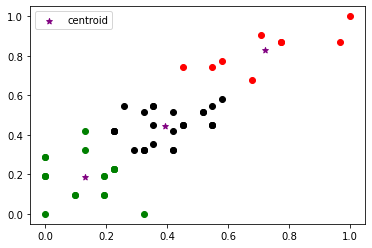

In [30]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.home_score,df1['away_score'],color='green')
plt.scatter(df2.home_score,df2['away_score'],color='red')
plt.scatter(df3.home_score,df3['away_score'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [31]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['home_score','away_score']])
    sse.append(km.inertia_)

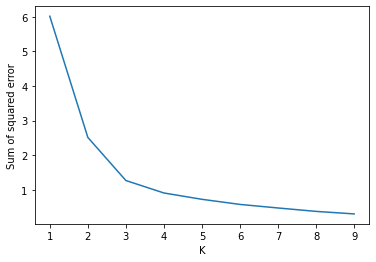

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)